# Statistical Analysis of Results

We compare human and biomarker responses using generalized linear mixed-effects model (GLMM). We use `bambi` as a well-developed bayesian tool of analysis.

In [1]:
import bambi as bmb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
human_responses = pd.read_csv("human_predictions.csv")
machine_responses = pd.read_csv("machine_predictions.csv")

In [3]:
human_responses

,Unnamed: 0,rater_id,sample_index,uid,task,shared,pid,duration,l1,status,...,file,decision,confidence,cause,otherCauseText,origCause,first_lang,correct,age_range,severity
0,0,rater_1,0,qpn_MNI0438_recall_childhood_en_Batch2_1,recall,global,MNI0438,30.000000,English,HC,...,sample_0.wav,control,leaning,healthy,NaN,NaN,True,1,unknown,unknown
1,1,rater_1,1,qpn_PD01182_read_fr_Batch1_0,read,global,PD01182,30.000000,French,HC,...,sample_1.wav,parkinsons,leaning,voice,NaN,NaN,True,0,73-82,mild
2,2,rater_1,2,qpn_PD01067_read_en_Batch1_0,read,global,PD01067,30.000000,English,HC,...,sample_2.wav,control,confident,healthy,NaN,NaN,True,1,63-72,unknown
3,3,rater_1,3,qpn_PD00267_dpt_fr_Batch1_0,dpt,global,PD00267,30.000000,French,PD,...,sample_3.wav,parkinsons,certain,voice,NaN,NaN,True,1,73-82,moderate
4,4,rater_1,4,qpn_PD01270_recall_childhood_fr_Batch1_0,recall,individual,PD01270,30.000000,French,PD,...,sample_4.wav,control,certain,healthy,NaN,NaN,True,0,63-72,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,572,rater_10,59,qpn_MNI0454_recall_childhood_en_Batch2_5,recall,individual,MNI0454,30.000000,English,HC,...,sample_59.wav,parkinsons,unsure,voice,NaN,NaN,True,0,unknown,unknown
573,573,rater_10,60,qpn_PD01383_a2_Batch2_1,vowel_repeat,global,PD01383,17.036500,French,HC,...,sample_60.wav,parkinsons,unsure,voice,NaN,NaN,False,0,unknown,unknown
574,574,rater_10,61,qpn_MNI0399_read_fr_Batch2_1,read,individual,MNI0399,30.000000,French,PD,...,sample_61.wav,control,unsure,prosody,NaN,NaN,True,0,unknown,severe
575,575,rater_10,62,qpn_MNI0420_dpt_en_Batch2_0,dpt,individual,MNI0420,30.000000,English,HC,...,sample_62.wav,control,certain,healthy,NaN,NaN,True,1,unknown,unknown


In [4]:
machine_responses

,uid,pid,sex,age,path,start,duration,task,updrs,status,...,DPI_znorm,UPR_znorm,VOT_znorm,GNE_znorm,SFSB_corr,F0SD_corr,DPI_corr,UPR_corr,VOT_corr,GNE_corr
0,qpn_PD01126_recall_la_fr_Batch1_0,PD01126,M,74.0,/home/competerscience/Documents/data/Neuro_spl...,0.0,30.000000,recall,50.0,PD,...,1.880040,1.956434,0.834392,-1.750997,1,0,1,1,1,1
1,qpn_PD01126_repeat_combined_fr_Batch1_0,PD01126,M,74.0,/home/competerscience/Documents/data/Neuro_spl...,0.0,9.227000,repeat,50.0,PD,...,-0.303765,0.710894,1.396668,-0.750474,1,1,0,1,1,1
2,qpn_PD01126_dpt_fr_Batch1_0,PD01126,M,74.0,/home/competerscience/Documents/data/Neuro_spl...,0.0,30.000000,dpt,50.0,PD,...,3.839517,2.617332,-0.323236,-0.843970,1,1,1,1,0,1
3,qpn_PD01126_dpt_fr_Batch1_1,PD01126,M,74.0,/home/competerscience/Documents/data/Neuro_spl...,30.0,30.000000,dpt,50.0,PD,...,1.588145,0.953532,1.094268,-0.557008,1,1,1,1,1,1
4,qpn_PD01126_dpt_fr_Batch1_2,PD01126,M,74.0,/home/competerscience/Documents/data/Neuro_spl...,60.0,30.000000,dpt,50.0,PD,...,6.775761,1.600566,1.526268,-2.263212,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,qpn_PD01056_recall_la_en_Batch1_2,PD01056,M,78.0,/home/competerscience/Documents/data/Neuro_spl...,60.0,30.000000,recall,14.0,PD,...,0.126645,-0.074109,0.640666,0.310617,1,0,1,0,1,0
3191,qpn_PD01056_recall_la_en_Batch1_3,PD01056,M,78.0,/home/competerscience/Documents/data/Neuro_spl...,90.0,30.000000,recall,14.0,PD,...,0.184348,0.377268,0.031140,1.120571,0,0,1,1,0,0
3192,qpn_PD01056_read_fr_Batch1_0,PD01056,M,78.0,/home/competerscience/Documents/data/Neuro_spl...,0.0,30.000000,read,14.0,PD,...,-0.811877,-0.853700,0.027765,0.902134,0,1,0,0,0,0
3193,qpn_PD01056_repeat_combined_en_Batch1_0,PD01056,M,78.0,/home/competerscience/Documents/data/Neuro_spl...,0.0,11.870250,repeat,14.0,PD,...,2.127339,1.244697,-0.543736,-0.724310,1,0,1,1,0,1


In [5]:
# Merge dataframes, putting adding a "source" column to distinguisn human vs. biomarker a vs. biomarker b etc.

# List the columns that represent our different "sources"
biomarker_cols = [
    'SFSB_corr', 'F0SD_corr', 'DPI_corr', #'UPR_corr', 
    'VOT_corr', 'GNE_corr', #'all_corr', 'no_SFSB_corr'
]

# We "melt" the machine data to make it long-form
shared_columns = ['uid', 'pid', 'sex', 'status', 'age_range', 'severity', 'task', 'first_lang']
machine_long = machine_responses.melt(
    id_vars=shared_columns,
    value_vars=biomarker_cols,
    var_name='source',
    value_name='correct'
)

# Clean up the source names (e.g., 'SFSB_corr' -> 'SFSB')
machine_long['source'] = machine_long['source'].str.replace('_corr', '')
# For the machine, the rater_id is effectively the source itself
machine_long['rater_id'] = machine_long['source']
# Remove voice because we don't have machine data for this
machine_long = machine_long[machine_long["task"].isin(["recall", "read", "dpt", "repeat"])]

# --- Step 2: Prepare Human Data ---
# We only need the columns that match the machine data
human_subset = human_responses[shared_columns + ['correct', 'rater_id']].copy()
human_subset['source'] = 'Human'
# Remove voice because we don't have machine data for this
human_subset = human_subset[human_subset["task"].isin(["recall", "read", "dpt", "repeat"])]

# --- Step 3: Combine ---
combined_df = pd.concat([human_subset, machine_long], ignore_index=True)

# Important: Convert categorical columns to strings/categories for the model
cat_cols = shared_columns + ['source', 'rater_id']
for col in cat_cols:
    combined_df[col] = combined_df[col].astype(str)

print(f"Total rows in combined dataset: {len(combined_df)}")

Total rows in combined dataset: 16351


In [6]:
model = bmb.Model(
    f"correct ~ source * task + source * status:severity + source * age_range + source * sex + source * first_lang + (1|rater_id) + (1|uid) + (1|pid)",
    data=combined_df,
    family="bernoulli"
)

result = model.fit(draws=2000, tune=1000, target_accept=0.95, inference_method="nutpie")

Modeling the probability that correct==1


Progress,Draws,Divergences,Step Size,Gradients/Draw
,3000,0,0.08,63
,3000,0,0.08,63
,3000,0,0.07,63
,3000,0,0.08,63


In [7]:
import itertools

# Create the cartesian product (all combinations)
#keys = ['source', 'task', 'sex', 'first_lang', 'severity', 'age_range']
#keys = ['source', 'task', 'sex', 'first_lang', 'status', 'age_range']
keys = ['source', 'task', 'sex', 'first_lang', 'severity', 'status', 'age_range']
combinations = list(itertools.product(*[combined_df[k].unique() for k in keys]))
grid_df = pd.DataFrame(combinations, columns=keys)

# Filter the unseen combos, there's no such thing as a "severe" "healthy control"
grid_df = grid_df[(grid_df["severity"] == "unknown") | (grid_df["status"] == "PD")]

# Generate Predictions using the Model
# kind='response' gives you the probability 'p', not the binary 0/1 outcome.
# include_group_specific=False ensures we predict for the "population average" 
# rather than specific existing pids/uids.
model.predict(result, data=grid_df, kind='response', include_group_specific=False)

In [8]:
result.posterior["p"].shape

(4, 2000, 1920)

In [9]:
# This gives you posterior predictive samples for each observation (row in df)
# pred_probs has shape: (chain, draw, observation)
pred_probs = result.posterior['p']


def per_category_acc(category, source):
    """Computes credible intervals for observed data"""
    print(category)
    print("-" * len(category))
    for value in grid_df[category].unique():
        indices = (grid_df[category] == value) & (grid_df["source"] == source)
        preds = pred_probs[:, :, indices]
        accuracy_per_draw = preds.mean(dim='__obs__')
        
        # Stack chain and draw into single dimension for quantiles
        # This gives you all posterior samples in one array
        all_samples = accuracy_per_draw.stack(sample=('chain', 'draw'))
        
        # Get percentiles across ALL posterior samples
        lower = all_samples.quantile(0.025).values
        median = all_samples.quantile(0.50).values
        upper = all_samples.quantile(0.975).values
        mean = all_samples.mean().values  # Posterior mean
        std = all_samples.std().values    # Posterior std (your "standard error")
        
        gap = " " * (13 - len(str(value)))
        print(f"{value}:{gap}{median:.1%} [{lower:.1%}, {upper:.1%}] (mean={mean:.1%}, std={std:.1%})")
    print("")


In [10]:
per_category_acc("task", "Human")
per_category_acc("severity", "Human")
per_category_acc("age_range", "Human")
per_category_acc("sex", "Human")
per_category_acc("first_lang", "Human")

task
----
recall:       67.9% [57.4%, 77.1%] (mean=67.7%, std=5.1%)
read:         74.4% [64.5%, 82.8%] (mean=74.2%, std=4.7%)
dpt:          69.1% [59.5%, 77.5%] (mean=69.0%, std=4.6%)
repeat:       55.2% [42.7%, 67.3%] (mean=55.2%, std=6.3%)

severity
--------
unknown:      72.1% [62.0%, 80.3%] (mean=71.9%, std=4.7%)
mild:         43.5% [27.5%, 60.9%] (mean=43.7%, std=8.5%)
moderate:     82.2% [72.5%, 89.3%] (mean=81.8%, std=4.3%)
severe:       63.9% [43.3%, 80.4%] (mean=63.3%, std=9.6%)

age_range
---------
unknown:      62.1% [52.6%, 71.1%] (mean=62.1%, std=4.7%)
73-82:        71.7% [57.6%, 83.7%] (mean=71.4%, std=6.7%)
63-72:        72.3% [61.0%, 81.6%] (mean=72.0%, std=5.3%)
53-62:        60.6% [48.3%, 72.6%] (mean=60.5%, std=6.3%)

sex
---
M:            66.9% [57.5%, 75.8%] (mean=66.8%, std=4.7%)
F:            66.3% [57.7%, 74.3%] (mean=66.2%, std=4.3%)

first_lang
----------
True:         65.0% [56.8%, 73.0%] (mean=65.0%, std=4.1%)
False:        68.2% [57.7%, 77.2%] (mean=68.0%, 

In [11]:
per_category_acc("task", "SFSB")
per_category_acc("severity", "SFSB")
per_category_acc("age_range", "SFSB")
per_category_acc("sex", "SFSB")
per_category_acc("first_lang", "SFSB")

task
----
recall:       61.1% [49.6%, 74.3%] (mean=61.4%, std=5.8%)
read:         59.2% [47.5%, 72.9%] (mean=59.5%, std=6.0%)
dpt:          60.2% [48.8%, 73.5%] (mean=60.5%, std=5.9%)
repeat:       59.2% [47.1%, 72.9%] (mean=59.4%, std=6.2%)

severity
--------
unknown:      56.7% [45.2%, 70.7%] (mean=57.1%, std=6.0%)
mild:         63.0% [51.3%, 75.9%] (mean=63.1%, std=5.9%)
moderate:     65.6% [53.7%, 78.2%] (mean=65.7%, std=5.8%)
severe:       57.9% [44.2%, 72.6%] (mean=58.0%, std=6.9%)

age_range
---------
unknown:      52.7% [39.4%, 67.9%] (mean=53.0%, std=7.1%)
73-82:        63.6% [51.7%, 76.7%] (mean=63.8%, std=6.0%)
63-72:        63.3% [52.0%, 76.0%] (mean=63.5%, std=5.7%)
53-62:        60.3% [48.2%, 73.8%] (mean=60.5%, std=6.1%)

sex
---
M:            63.3% [52.2%, 76.3%] (mean=63.6%, std=5.7%)
F:            56.4% [44.7%, 70.0%] (mean=56.8%, std=6.0%)

first_lang
----------
True:         59.3% [48.0%, 72.9%] (mean=59.7%, std=5.8%)
False:        60.4% [49.1%, 73.6%] (mean=60.7%, 

In [12]:
def compute_stats(categories, sources, values):
    """Computes mean, std for observed data"""

    results = {}
    for source in sources:
        means = []
        errs = []
        probs = []
        for cat in categories:
            for value in values[cat]:
                indices = (grid_df[cat] == value) & (grid_df["source"] == source)
                preds = pred_probs[:, :, indices]
                accuracy_per_draw = preds.mean(dim='__obs__')
                
                mean = accuracy_per_draw.mean().values * 100  # Posterior mean
                std = accuracy_per_draw.std().values * 100    # Posterior std (your "standard error")
    
                means.append(mean)
                errs.append(std)

                if source != "SFSB":
                    SFSB_indices = (grid_df[cat] == value) & (grid_df["source"] == "SFSB")
                    SFSB_preds = pred_probs[:, :, SFSB_indices]
                    prob = (accuracy_per_draw > SFSB_preds.mean(dim='__obs__')).mean().values
                    probs.append(prob)
        results[source] = means
        results[source + "_err"] = errs
        results[source + "_prob"] = probs
    return results

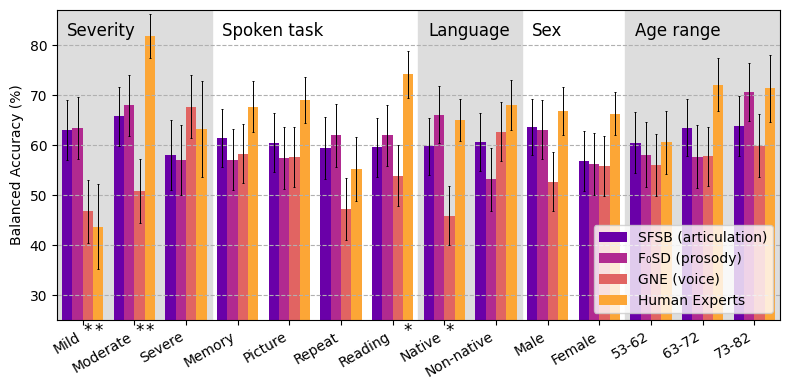

In [13]:
categories = ["severity", "task", "first_lang", "sex", "age_range"]
sources = ["SFSB", "F0SD", "GNE", "Human"]
# To control the order of the different category values, we list them here
values = {
    "severity": ["mild", "moderate", "severe"],
    "task": ["recall", "dpt", "repeat", "read"],
    "first_lang": ["True", "False"],
    "sex": ["M", "F"],
    "age_range": ["53-62", "63-72", "73-82"],
}
labels = {"SFSB": "SFSB (articulation)", "F0SD": "F\u2080SD (prosody)", "GNE": "GNE (voice)", "Human": "Human Experts"}
task_labels = {"task": "Spoken task", "severity": "Severity", "age_range": "Age range", "sex": "Sex", "first_lang": "Language"}
x_labels = {
    "recall": "Memory", "read": "Reading", "dpt": "Picture", "repeat": "Repeat",
    "True": "Native", "False": "Non-native",
    "M": "Male", "F": "Female",
    "mild": "Mild", "moderate": "Moderate", "severe": "Severe",
    "53-62": "53-62", "63-72": "63-72", "73-82": "73-82",
}
results = compute_stats(categories, sources, values)
flat_values = [v for l in values.values() for v in l]
x = np.arange(len(flat_values))
width = 1 / (len(sources) + 1)

fig, ax = plt.subplots(figsize=(8,4))
def map_width(x, i):
    return x + width * (i - len(sources) / 2 + 0.5)

# Add alternating background shading for categories
current_x = 0
active = True
for cat in categories:
    n_items = len(values[cat])
    
    ax.text(s=task_labels[cat], x=current_x - 0.3, y=81, va="bottom", fontsize="large")
    if active:
        ax.axvspan(current_x - 0.5, current_x + n_items - 0.5, color="#dddddd")
    current_x += n_items
    active = not active

# Plot bars with error bars
cmap = plt.get_cmap('plasma')
for i, source in enumerate(sources):
    bars = ax.bar(map_width(x, i), results[source], width, error_kw=dict(lw=0.7, capthick=0.7),
               yerr=results[f"{source}_err"], capsize=1, label=labels[source], color=cmap(width * (i + 1)))


for i, source in enumerate(sources):
    if source == "SFSB":
        continue
    for j, value in enumerate(flat_values):
        prob = results[f"{source}_prob"][j]
        if prob < 0.05 or prob > 0.95:
            ax.text(s="*", x=map_width(j, i), y=21, ha="center", va="bottom", fontsize="large", color="black")


# Formatting
ax.set_ylabel("Balanced Accuracy (%)")
#ax.set_title("Parkinson's Disease Detection Performance Comparison: Biomarker vs. Human Expert")
ax.set_xticks(x)
ax.set_xticklabels([x_labels[v] for v in flat_values], rotation=30, ha="right")
ax.set_ylim(25, 87)
ax.legend(loc="lower right")
ax.margins(x=0)

# Group label

# Gridlines
ax.yaxis.grid(True, linestyle="--")

plt.tight_layout()
plt.savefig("performance_comparison_biomarker.pdf")

plt.show()